In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('dataset.csv',index_col=0)

In [25]:
df.shape

(114000, 20)

In [32]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [67]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [46]:
pop = df['popularity']

In [60]:
df.loc[df['popularity'] == 100]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,pop


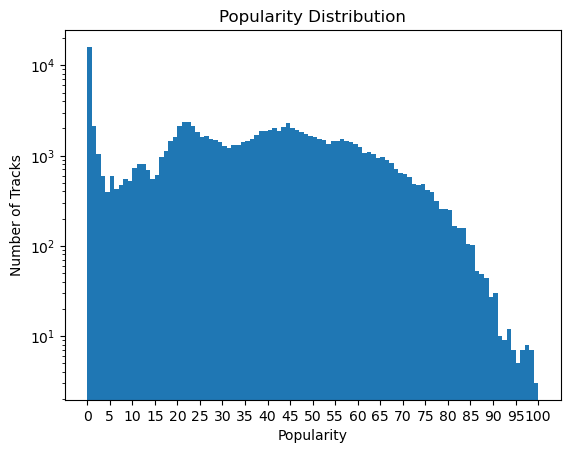

In [61]:
plt.hist(pop,bins=range(101),log=True);
plt.ylabel("Number of Tracks");
plt.xlabel("Popularity");
plt.title("Popularity Distribution");
plt.xticks(range(0,101,5));

In [96]:
# Energy and Popularity

In [ ]:
# Energy is a value between 0 and 1, while popularity is between 0 and 100
# Can more energetic tracks become popular?

In [99]:
high_energy = (len(df[df['energy'] >= 0.7]) / len(df)) * 100

In [132]:
high_energy_pop = df[df['energy'] >= 0.7]['popularity'].mean()

In [102]:
low_energy = (len(df[df['energy'] <= 0.5]) / len(df)) * 100

In [131]:
low_energy_pop = df[df['energy'] <= 0.5]['popularity'].mean()

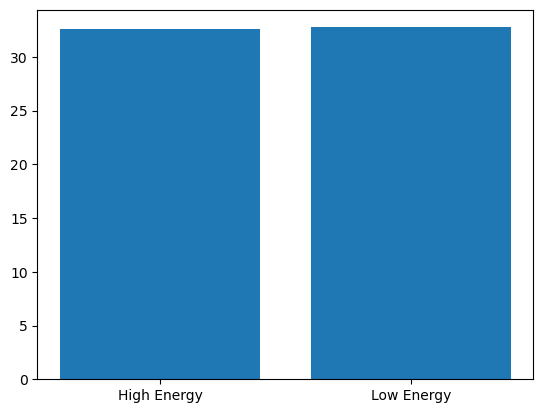

In [129]:
plt.bar(["High Energy","Low Energy"],[high_energy_pop,low_energy_pop]);

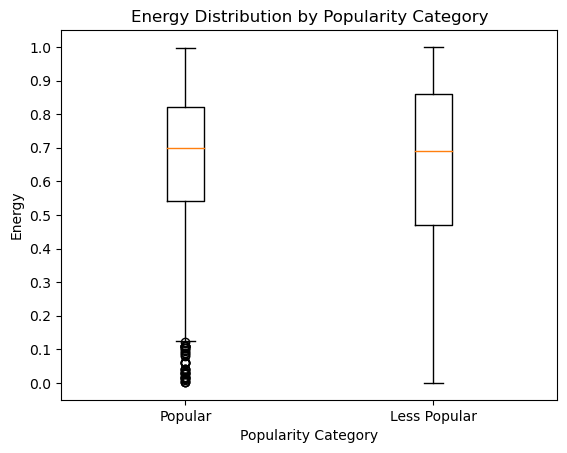

In [162]:
energy_pop = df[df['popularity']>= 70]['energy']
energy_npop = df[df['popularity']<= 50]['energy']
label = ['Popular','Less Popular']
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot([energy_pop, energy_npop], labels=label);
ax.set_xlabel('Popularity Category')
ax.set_ylabel('Energy')
ax.set_title('Energy Distribution by Popularity Category');
y_ticks = np.arange(0,1.1,0.1)
ax.set_yticks(y_ticks);


***Artist Analysis***

In [227]:
most_tracks = df.groupby(['artists'])['track_id'].count().sort_values(ascending=False)